## Business Understanding

Airbnb is a popular online platform in the USA for lodging services. Similar to a broker, the company itself does not own any real estate. The company's profit is based upon the commission for each booking. The hosts list their properties on Airbnb and accept or deny the booking request by the other Airbnb members. The hosts' income is mainly from the listing price. To maximize the income or even to evaluate if it is worthwhile to list a property, it is critical to understand the relation between the prices and other factors such as time, location, room condition, reviews, house rules and others.
For the scope of this study, I will try to answer the following 4 questions:
1. What is the price range?
2. Are there any seasonal, weekly trends of the listing price?
3. How is the impact of zipcode on the listing price?
4. What is the correlation beween listing price and other factors?


## Data Understanding

There are three .csv files availble for analysis. Let us import and have an overview on them.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
calendar = pd.read_csv('calendar.csv')
listing = pd.read_csv('listings.csv')
review = pd.read_csv('reviews.csv')

In [3]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [5]:
#find percentage of missing values for each column
listings_missing = listing.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_nan = listings_missing[listings_missing > 0]

listings_columns_nan.sort_values(ascending=False)

license                        100.000000
square_feet                     97.459403
monthly_price                   60.267156
security_deposit                51.126244
weekly_price                    47.380828
notes                           42.063908
neighborhood_overview           27.029859
cleaning_fee                    26.977475
transit                         24.463070
host_about                      22.498690
host_acceptance_rate            20.246202
review_scores_accuracy          17.234154
review_scores_checkin           17.234154
review_scores_value             17.181771
review_scores_location          17.155579
review_scores_cleanliness       17.103195
review_scores_communication     17.050812
review_scores_rating            16.946045
reviews_per_month               16.422211
first_review                    16.422211
last_review                     16.422211
space                           14.903091
host_response_time              13.698271
host_response_rate              13

We can see that the listing.csv contains many feasures of each listing. Some of them have full entries, while the others have NaN values. I can also see that not all of the features are useful, such as the url(s). More details will be discussed in the data prepration section.

In [6]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [8]:
calendar.groupby('available')['price'].count()

available
f         0
t    934542
Name: price, dtype: int64

The calendar dataframe contains the avalibility of each listing on each date. It seems the price of the unavailble listing is $0.

In [9]:
review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [10]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


The review dataframe contains the details of reviews of each stay. However, the details of reviews are not of interest in this study, therefore the review dataframe is not used in the following analysis.


## Data Preparation

### To-do list
1. Remove the irrelevant columns
2. Merge datasets
3. Remove or fill in NaNs
4. Remove '$' '%', and ',' signs and convert the datatype
5. Convert date to datetime type
6. host_id and listing_id should convert to string type
7. Split some columns into dummy columns for modeling


In [11]:
# Only select some columns of interest
df_listing = listing[['id', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
               'host_listings_count', 'host_identity_verified', 'zipcode', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 
               'beds', 'security_deposit', 'cleaning_fee', 'number_of_reviews', 'review_scores_rating', 'requires_license', 'cancellation_policy', 
               'reviews_per_month']]

In [12]:
# Change the column name and merge two dataframes
df_listing = df_listing.rename(index=str, columns={"id": "listing_id"})
df = pd.merge(calendar, df_listing, on = 'listing_id')

In [13]:
df.head()

,listing_id,date,available,price,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,...,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,number_of_reviews,review_scores_rating,requires_license,cancellation_policy,reviews_per_month
0,241032,2016-01-04,t,$85.00,956883,96%,100%,f,3.0,t,...,1.0,1.0,1.0,NaN,NaN,207,95.0,f,moderate,4.07
1,241032,2016-01-05,t,$85.00,956883,96%,100%,f,3.0,t,...,1.0,1.0,1.0,NaN,NaN,207,95.0,f,moderate,4.07
2,241032,2016-01-06,f,NaN,956883,96%,100%,f,3.0,t,...,1.0,1.0,1.0,NaN,NaN,207,95.0,f,moderate,4.07
3,241032,2016-01-07,f,NaN,956883,96%,100%,f,3.0,t,...,1.0,1.0,1.0,NaN,NaN,207,95.0,f,moderate,4.07
4,241032,2016-01-08,f,NaN,956883,96%,100%,f,3.0,t,...,1.0,1.0,1.0,NaN,NaN,207,95.0,f,moderate,4.07


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 24 columns):
listing_id                1393570 non-null int64
date                      1393570 non-null object
available                 1393570 non-null object
price                     934542 non-null object
host_id                   1393570 non-null int64
host_response_rate        1202675 non-null object
host_acceptance_rate      1111425 non-null object
host_is_superhost         1392840 non-null object
host_listings_count       1392840 non-null float64
host_identity_verified    1392840 non-null object
zipcode                   1391015 non-null object
property_type             1393205 non-null object
room_type                 1393570 non-null object
accommodates              1393570 non-null int64
bathrooms                 1387730 non-null float64
bedrooms                  1391380 non-null float64
beds                      1393205 non-null float64
security_deposit          681090 non-

In [15]:
# drop rows with NaN price values
df = df.dropna(subset=['price'])

In [16]:
# Remove $ signs in the price column, convert data type and save it as a new column
df['price_($)'] = df['price'].astype(str)
df['price_($)'] = df['price_($)'].str.replace('$', '')
df['price_($)'] = df['price_($)'].str.replace(',', '')
df['price_($)'] = df['price_($)'].astype('float')
df = df.drop(columns = ['price'])

In [17]:
# Remove $ signs in the security deposit column, convert data type and save it as a new column
df['security_deposit_($)'] = df['security_deposit'].astype(str)
df['security_deposit_($)'] = df['security_deposit_($)'].str.replace('$', '')
df['security_deposit_($)'] = df['security_deposit_($)'].str.replace(',', '')
df['security_deposit_($)'] = df['security_deposit_($)'].astype('float')
df = df.drop(columns = ['security_deposit'])

In [18]:
# Remove $ signs in the cleaning fee column, convert data type and save it as a new column
df['cleaning_fee_($)'] = df['cleaning_fee'].astype(str)
df['cleaning_fee_($)'] = df['cleaning_fee_($)'].str.replace('$', '')
df['cleaning_fee_($)'] = df['cleaning_fee_($)'].str.replace(',', '')
df['cleaning_fee_($)'] = df['cleaning_fee_($)'].astype('float')
df = df.drop(columns = ['cleaning_fee'])

In [19]:
df['host_id'] = df['host_id'].astype(str)
df['listing_id'] = df['listing_id'].astype(str)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 24 columns):
listing_id                934542 non-null object
date                      934542 non-null object
available                 934542 non-null object
host_id                   934542 non-null object
host_response_rate        826028 non-null object
host_acceptance_rate      764235 non-null object
host_is_superhost         934450 non-null object
host_listings_count       934450 non-null float64
host_identity_verified    934450 non-null object
zipcode                   933290 non-null object
property_type             934233 non-null object
room_type                 934542 non-null object
accommodates              934542 non-null int64
bathrooms                 929739 non-null float64
bedrooms                  932539 non-null float64
beds                      934177 non-null float64
number_of_reviews         934542 non-null int64
review_scores_rating      790005 non-null float64
req

In [21]:
df.head()

,listing_id,date,available,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,zipcode,...,bedrooms,beds,number_of_reviews,review_scores_rating,requires_license,cancellation_policy,reviews_per_month,price_($),security_deposit_($),cleaning_fee_($)
0,241032,2016-01-04,t,956883,96%,100%,f,3.0,t,98119,...,1.0,1.0,207,95.0,f,moderate,4.07,85.0,NaN,NaN
1,241032,2016-01-05,t,956883,96%,100%,f,3.0,t,98119,...,1.0,1.0,207,95.0,f,moderate,4.07,85.0,NaN,NaN
9,241032,2016-01-13,t,956883,96%,100%,f,3.0,t,98119,...,1.0,1.0,207,95.0,f,moderate,4.07,85.0,NaN,NaN
10,241032,2016-01-14,t,956883,96%,100%,f,3.0,t,98119,...,1.0,1.0,207,95.0,f,moderate,4.07,85.0,NaN,NaN
14,241032,2016-01-18,t,956883,96%,100%,f,3.0,t,98119,...,1.0,1.0,207,95.0,f,moderate,4.07,85.0,NaN,NaN


In [22]:
# Convert datatype in the date column into datetime
df['date'] = pd.to_datetime(df['date'])

In [23]:
# Remove % sign and convert to float datatype
df[['host_response_rate', 'host_acceptance_rate']] = df[['host_response_rate', 'host_acceptance_rate']].replace({'\%':''}, regex = True).astype('float') / 100

In [24]:
df.head()

,listing_id,date,available,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,zipcode,...,bedrooms,beds,number_of_reviews,review_scores_rating,requires_license,cancellation_policy,reviews_per_month,price_($),security_deposit_($),cleaning_fee_($)
0,241032,2016-01-04,t,956883,0.96,1.0,f,3.0,t,98119,...,1.0,1.0,207,95.0,f,moderate,4.07,85.0,NaN,NaN
1,241032,2016-01-05,t,956883,0.96,1.0,f,3.0,t,98119,...,1.0,1.0,207,95.0,f,moderate,4.07,85.0,NaN,NaN
9,241032,2016-01-13,t,956883,0.96,1.0,f,3.0,t,98119,...,1.0,1.0,207,95.0,f,moderate,4.07,85.0,NaN,NaN
10,241032,2016-01-14,t,956883,0.96,1.0,f,3.0,t,98119,...,1.0,1.0,207,95.0,f,moderate,4.07,85.0,NaN,NaN
14,241032,2016-01-18,t,956883,0.96,1.0,f,3.0,t,98119,...,1.0,1.0,207,95.0,f,moderate,4.07,85.0,NaN,NaN


In [25]:
# Fill the security deposit and cleaning fee columns with $0, as those are one-time charges
df[['security_deposit_($)', 'cleaning_fee_($)']] = df[['security_deposit_($)', 'cleaning_fee_($)']].fillna(value=0)

In [26]:
# Check the ratio of NaN values
missing_df = df.isnull().mean()*100
df_columns_nan = missing_df[missing_df > 0]
df_columns_nan.sort_values(ascending=False)

host_acceptance_rate      18.223579
review_scores_rating      15.466079
reviews_per_month         14.912759
host_response_rate        11.611463
bathrooms                  0.513942
bedrooms                   0.214330
zipcode                    0.133969
beds                       0.039057
property_type              0.033064
host_identity_verified     0.009844
host_listings_count        0.009844
host_is_superhost          0.009844
dtype: float64

In [27]:
# Create a new copy
df_new = df.copy()

In [28]:
# Drop all rows with NaN values
df_new.dropna(axis=0, inplace=True)

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671336 entries, 0 to 1392474
Data columns (total 24 columns):
listing_id                671336 non-null object
date                      671336 non-null datetime64[ns]
available                 671336 non-null object
host_id                   671336 non-null object
host_response_rate        671336 non-null float64
host_acceptance_rate      671336 non-null float64
host_is_superhost         671336 non-null object
host_listings_count       671336 non-null float64
host_identity_verified    671336 non-null object
zipcode                   671336 non-null object
property_type             671336 non-null object
room_type                 671336 non-null object
accommodates              671336 non-null int64
bathrooms                 671336 non-null float64
bedrooms                  671336 non-null float64
beds                      671336 non-null float64
number_of_reviews         671336 non-null int64
review_scores_rating      671336 non-null f

In [30]:
df_new.head()

,listing_id,date,available,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,zipcode,...,bedrooms,beds,number_of_reviews,review_scores_rating,requires_license,cancellation_policy,reviews_per_month,price_($),security_deposit_($),cleaning_fee_($)
0,241032,2016-01-04,t,956883,0.96,1.0,f,3.0,t,98119,...,1.0,1.0,207,95.0,f,moderate,4.07,85.0,0.0,0.0
1,241032,2016-01-05,t,956883,0.96,1.0,f,3.0,t,98119,...,1.0,1.0,207,95.0,f,moderate,4.07,85.0,0.0,0.0
9,241032,2016-01-13,t,956883,0.96,1.0,f,3.0,t,98119,...,1.0,1.0,207,95.0,f,moderate,4.07,85.0,0.0,0.0
10,241032,2016-01-14,t,956883,0.96,1.0,f,3.0,t,98119,...,1.0,1.0,207,95.0,f,moderate,4.07,85.0,0.0,0.0
14,241032,2016-01-18,t,956883,0.96,1.0,f,3.0,t,98119,...,1.0,1.0,207,95.0,f,moderate,4.07,85.0,0.0,0.0


## Modeling, Evaluation

### Question 1: What is the price range?

In [31]:
# Calculate the mean price for each listing_id
mean_price = df_new.groupby('listing_id').mean()['price_($)']

Text(0.5, 1.0, 'Counts of Listings with Different Price')

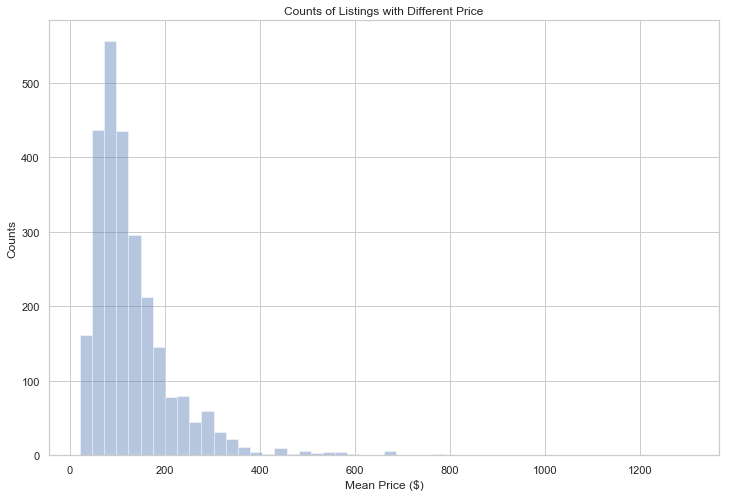

In [32]:
# Plot a histogram of the mean price
plt.figure(figsize = [12, 8])
sns.set(style="whitegrid")
sns.distplot(mean_price, kde=False);
plt.ylabel('Counts')
plt.xlabel('Mean Price ($)')
plt.title('Counts of Listings with Different Price')

The histogram shows the majority of the listing price is below \\$150. The most common price is \\$75-\\$100. It would be intersting to compare the listing price to the hotel price. Should airbnb listings charge a little less than the hotels?

### Question 2: Are there any seasonal, weekly trends of the listing price?

In [33]:
# apply aggregation
df_new = df_new.groupby('date')['price_($)'].mean().reset_index()

C:\Users\Andy Lin\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Mean Price of Airbnb Listings in Seattle')

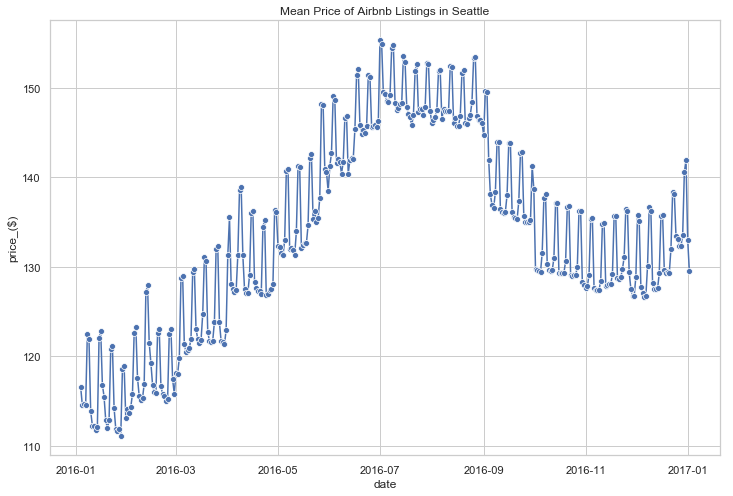

In [34]:
# Plot the price variation with respect to date
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='date', y='price_($)', marker="o", data=df_new)
ax.set_title('Mean Price of Airbnb Listings in Seattle')

The line plot clearly show there is some seasonal variation. The summer time (July to August) results in the highest mean price , ~ \\$150.  There is an abrupt price drop at the beginning of September, to ~ a \\$140 mean price. There is also an obvious drop at the beginning of October, to a mean price of ~ \\$135. And the the price remains stable until the end of the year. The lowest price happens at the beginning of the year, with a mean price ~ \\$120. The price continouly increases and reaches to the maximum in the summer time.

Another significant feature is that the price varies signicantly within a few days and is also periodic over the entire year. This may be due to the weekly variation. Let us check the weekly variation below.

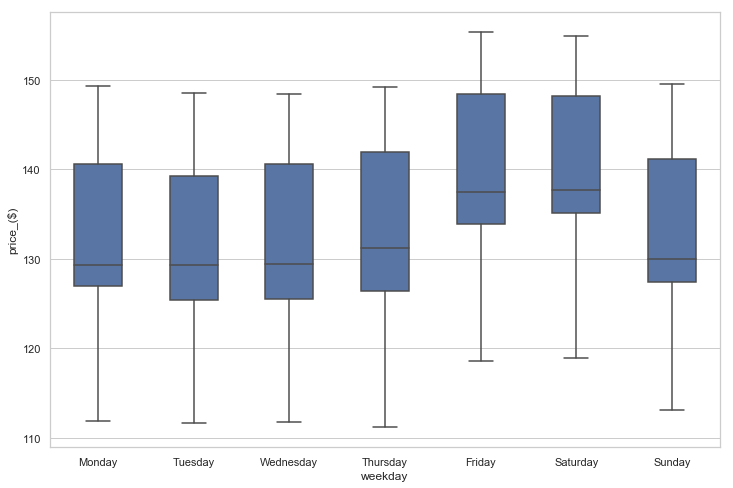

In [35]:
# create weekday column
df_new['weekday'] = df_new['date'].dt.weekday_name

# boxplot to see price distribution
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'weekday',  y = 'price_($)', data = df_new, color = sns.color_palette()[0], width=0.5)
plt.show()

The box plot clearly shows the weekly variaion of the listing price. The price on Friday and Saturday is the highest compared to the other days of the week. The median price on Friday and Saturday is ~ \\$138. The median price of the other days are ~\\$130.

### How is the impact of zipcode on the listing price?

In [36]:
# Make anyother copy
df_new2= df.copy()
df_new2.dropna(axis=0, inplace=True)

In [37]:
# group the mean price with date and zipcode
zipcodes = df_new2['zipcode'].unique()
price_by_month_zipcode = df_new2.groupby(['date','zipcode']).mean().reset_index()
price_by_month_zipcode.head()

,date,zipcode,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,reviews_per_month,price_($),security_deposit_($),cleaning_fee_($)
0,2016-01-04,98101,0.961758,1.000000,64.384615,4.153846,1.346154,1.285714,2.043956,22.967033,94.362637,2.046813,149.714286,110.879121,81.395604
1,2016-01-04,98102,0.944510,0.990196,6.833333,2.715686,1.132353,1.049020,1.392157,33.549020,93.715686,2.522843,109.774510,178.676471,39.098039
2,2016-01-04,98103,0.938000,1.000000,3.985185,3.555556,1.222222,1.370370,1.896296,29.274074,94.800000,2.008519,111.311111,151.925926,47.607407
3,2016-01-04,98104,0.943056,1.000000,14.444444,3.027778,1.083333,1.083333,1.472222,30.277778,94.000000,2.661944,149.666667,130.416667,51.277778
4,2016-01-04,98105,0.886500,1.000000,16.062500,3.737500,1.212500,1.287500,1.937500,15.325000,87.187500,1.348125,107.000000,142.500000,58.212500


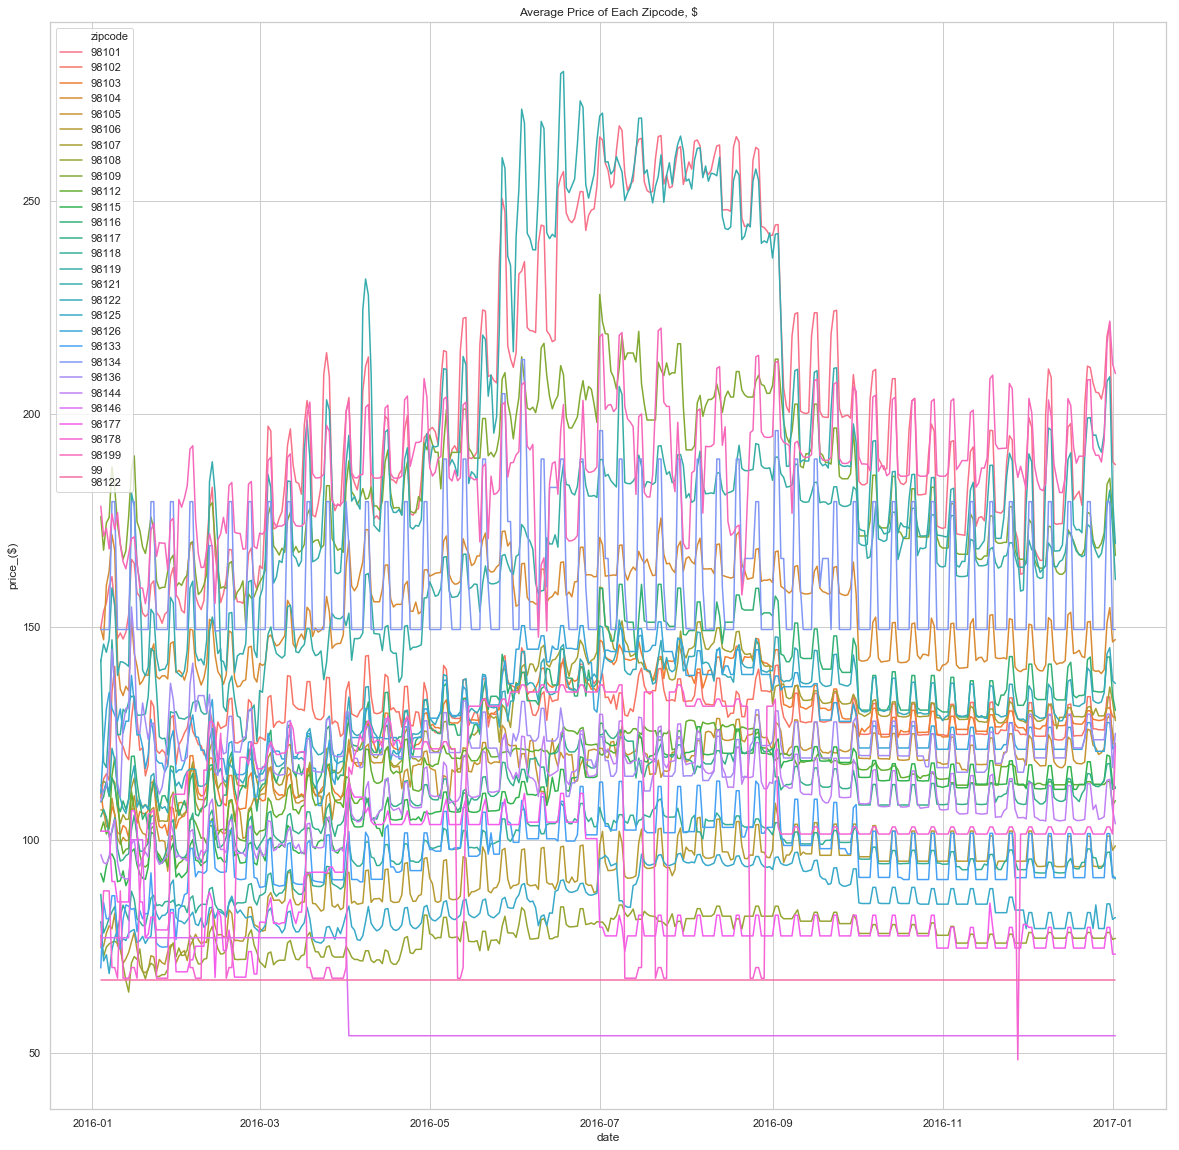

In [38]:
# Plot a line plot shows the mean price of each zipcode over the entire year.
fig = plt.figure(figsize=(20,20))
ax = sns.lineplot(x="date", y="price_($)", hue="zipcode", legend="full", markers = True, dashes=True, \
                   data=price_by_month_zipcode)
plt.title('Average Price of Each Zipcode, $')
plt.savefig('average Price of Each Zipcode')
plt.show()

In [39]:
# Sort values to better interpret the plot
price_by_month_zipcode.groupby('zipcode').mean()['price_($)'].sort_values()

zipcode
98146         59.923288
99\n98122     67.000000
98108         77.408409
98125         85.298673
98177         85.879180
98106         91.139653
98118         96.084350
98133         96.779339
98178        108.305936
98144        109.610723
98115        110.438026
98117        110.789480
98112        115.138593
98105        117.186801
98136        121.642796
98103        126.731526
98107        128.360814
98126        129.446727
98102        129.830074
98122        130.518700
98116        132.335692
98104        153.636338
98134        160.630594
98119        163.467168
98109        184.023917
98199        187.433869
98121        197.422845
98101        202.755502
Name: price_($), dtype: float64

The line plot is very busy. I tried to make the plot more clear. However, it is difficult due to too many series of data. However I can still draw a few useful conclsions:
1. the prices in areas with zipcode 98101 and 98121 are highest. The seasonal variation is larger than \\$50, which is also the highest among the areas with different codes.
2. the seasonal price variation in some zipcodes are not obvious, such as 98134.
3. the price in some areas (98146 and 99\n98122 for example) are stable, even without weekly variation. The flat fee is likely due to the lack of listings, i.e., the host keep the price the same over the entire year. Let us check the host id below.

In [40]:
df_new2[df_new2['zipcode'] == '98146']['host_id'].unique()

array(['5407579', '23498834'], dtype=object)

In [41]:
df_new2[df_new2['zipcode'] == '99\n98122']['host_id'].unique()

array(['48441443'], dtype=object)

In [42]:
df_new2[df_new2['zipcode'] == '98101']['host_id'].unique()

array(['10903708', '4962900', '26547165', '31751507', '21473544',
       '15787538', '26232234', '5241841', '8534462', '4411144',
       '18168733', '31032640', '11845596', '74305', '42529996',
       '29051256', '30283594', '22965312', '1002255', '19476601',
       '430709', '3792761', '2309561', '5506237', '22860305', '47394683',
       '9058822', '41935728', '14980831', '16587333', '34556161',
       '453540', '26498843', '8554626', '103427', '2392169', '37727926',
       '4874276', '661691', '48416955', '12197959', '41122913', '8263503',
       '15454102', '3294357', '42446972', '22501560', '15082394',
       '23316664', '38404316', '21153266', '15942582', '35324206',
       '18099944', '24243156', '31730119', '11610447', '20069008',
       '2232569', '33601666', '2405924', '16537099', '32394807',
       '9508208', '23312083', '30832', '34779932', '1025723', '10558142',
       '20220925', '2230478', '43053036', '721070', '38463938', '8905591',
       '48010503', '43220022', '101009

The area with zipcode 98146 only has 2 unique host_ids, and the area with zipcode 99\n98122 only has 1 unique host_id. In contast, the area with zipcide 98101 has >50 host ids. The flat price in some zipcode areas may due to the hosts' personal choices for simplicity.

### What is the correlation between listing price and other factors?

Let us start with the numerical variables.

In [43]:
numeric_vars = ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', \
                'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews',\
               'review_scores_rating', 'reviews_per_month', 'price_($)', 'security_deposit_($)', 'cleaning_fee_($)']

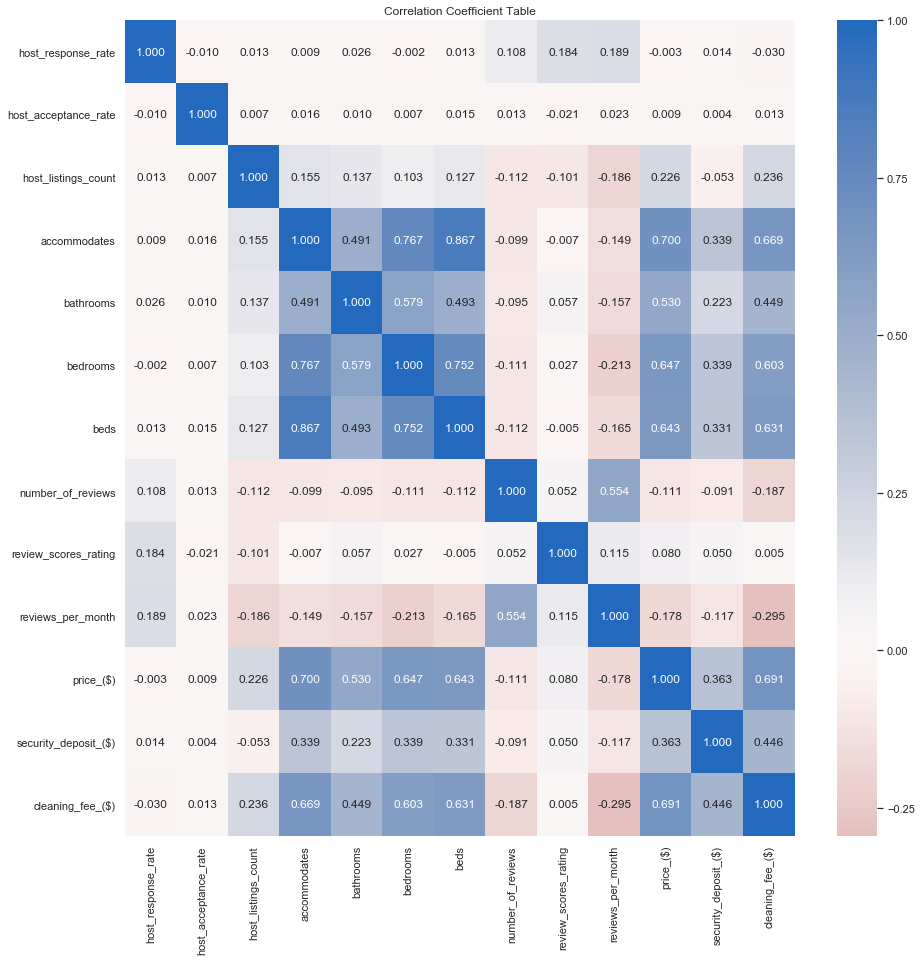

In [45]:
# correlation plot
plt.figure(figsize = [15, 15])
plt.title('Correlation Coefficient Table')
sns.heatmap(df_new2[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

The above correlation plot shows the price is most correlated to the accommodates, followed by cleaning fee, bedrooms, beds, and bathrooms. The results are as expected as the above factors are the most important in terms of lodging service. It is a little surprising that the price is almost not related to the review rating. This may due to that the difference of the ratings among all of the listing are not great. Let us check this below.

In [45]:
df_new2.review_scores_rating.describe()

count    671336.000000
mean         94.395695
std           6.267670
min          20.000000
25%          93.000000
50%          96.000000
75%          99.000000
max         100.000000
Name: review_scores_rating, dtype: float64

In [46]:
rating_check = df_new2[df_new2.review_scores_rating < 90]
rating_check.review_scores_rating.describe()

count    92181.000000
mean        82.135136
std          7.363850
min         20.000000
25%         80.000000
50%         84.000000
75%         87.000000
max         89.000000
Name: review_scores_rating, dtype: float64

The above statistics show that the review_scores_rating has a mean value of >94, maximum at 100, and the first quartile is 93. And over 85% of the entries have the ratings over 90. Therefore, the insignificance of the review_rating_scores may be due to the similar reviews obtained by the listings.

Now let us take some categorical variables into consideration. To do so, we need to encode these variables.

In [47]:
df_new3 = df_new2.drop(columns = ['available'])

In [48]:
# convert true or false value to 1 or 0
dummy_cols = ['host_is_superhost', 'host_identity_verified', 'requires_license']

for col in dummy_cols:
    df_new3[col] = df_new3[col].map(lambda x: 1 if x == 't' else 0)

# create dummy valuables
dummy_cols = ['zipcode', 'property_type', 'room_type', 'cancellation_policy']
df_new3 = pd.get_dummies(df_new3, columns=dummy_cols, dummy_na=True)

In [49]:
df_new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671336 entries, 0 to 1392474
Data columns (total 73 columns):
listing_id                       671336 non-null object
date                             671336 non-null datetime64[ns]
host_id                          671336 non-null object
host_response_rate               671336 non-null float64
host_acceptance_rate             671336 non-null float64
host_is_superhost                671336 non-null int64
host_listings_count              671336 non-null float64
host_identity_verified           671336 non-null int64
accommodates                     671336 non-null int64
bathrooms                        671336 non-null float64
bedrooms                         671336 non-null float64
beds                             671336 non-null float64
number_of_reviews                671336 non-null int64
review_scores_rating             671336 non-null float64
requires_license                 671336 non-null int64
reviews_per_month                67133

Now, let us do machine learning. I realized it is very slow to use some of machine learning algrithms such as SVR. I also skip the grid search for the hyperparameters for the scope of this study.

In [50]:
# import machine learning packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [51]:
# prepare train and test datasets for machine learning
TEST_SIZE = 0.2

df_new3 = df_new3.drop(columns = ['listing_id', 'host_id', 'date'])
X = df_new3.drop(columns = 'price_($)')
y = df_new3[['price_($)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=42)

In [53]:
# train with random forest regressor model
forest = RandomForestRegressor(n_estimators=500)
forest.fit(X_train, y_train.squeeze())

#calculate metrics for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 933.482, test: 926.147
Random Forest R^2 train: 0.910, test: 0.909


In [83]:
# get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
feature_importances = pd.DataFrame(values, columns = headers)
feature_importances = feature_importances.sort_values(by = ['score'], ascending = False)

In [84]:
top_feature_importances = forest_feature_importances.iloc[:15][:]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

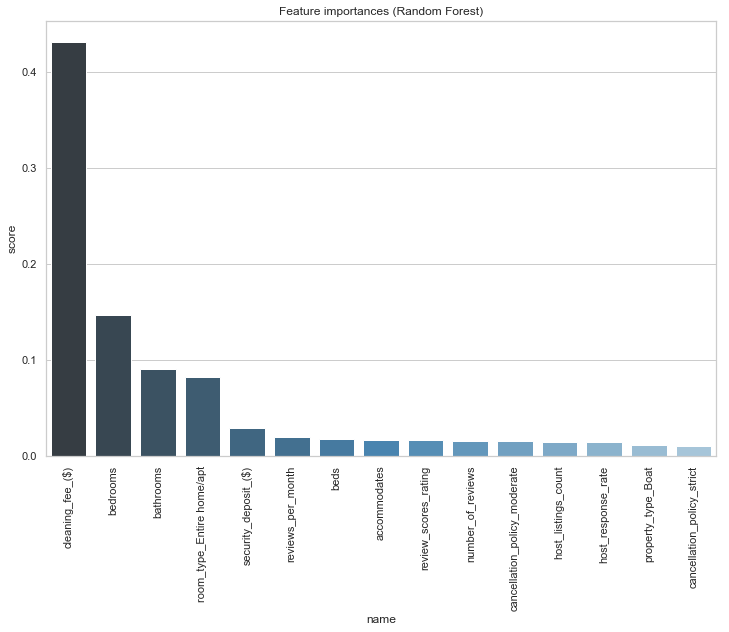

In [85]:
plt.figure(figsize=(12, 8))
plt.title('Feature importances (Random Forest)')
ax = sns.barplot(x="name", y="score", data=top_feature_importances, palette="Blues_d")
plt.xticks(rotation=90)

The machine learning using random forest regression shows that the most important feature for the listing price is cleaning_fee, followed by the bedrooms, bathrooms, room_type_Entire home/apt. This not 100% align with the results from the coorelation calculation. This may be explained by the fitting errors during the process, as we do not have a model that can predict the price yet.

## Summary

This study focuses on answering a few important questions on the Seattle Airbnb data.
### 1. What is the price range?
The majority of the listing price is below \\$150. The most common price is \\$75-\\$100. It would be intersting to compare the listing price to the hotel price. 

### 2. Are there any seasonal, weekly trends of the listing price?
There is some seasonal variation. The summer time (July to August) results in the highest mean price , ~ \\$150. There is an abrupt price drop at the beginning of September, to ~ a \\$140 mean price. There is also an obvious drop at the beginning of October, to a mean price of ~ \\$135. And the the price remains stable until the end of the year. The lowest price happens at the beginning of the year, with a mean price ~ \\$120. The price continously increases and reaches to the maximum in the summer time. 
There is weekly variaion of the listing price. The price on Friday and Saturday is the highest compared to the other days of the week. The median price on Friday and Saturday is ~ \\$138. The median price of the other days are ~ \\$130.

### 3. How is the impact of zipcode on the listing price?

- the prices in areas with zipcode 98101 and 98121 are highest. The seasonal variation is larger than \\$50, which is also the highest among the areas with different codes.
- the seasonal price variation in some zipcodes are not obvious, such as 98134.
- the price in some areas (98146 and 99\n98122 for example) are stable, even without weekly variation. The flat fee is likely due to the lack of listings, i.e., there are only a few hosts and they kept the price the same over the entire year. 


### 4. What is the correlation beween listing price and other factors?

If only numerical features are considered, the price is most correlated to the accomodates, followed by cleaning fee, bedrooms, beds, and bathrooms. The results are as expected as the above factors are the most important in terms of lodging service. It is a little surprising that the price is almost not related to the review rating. This may due to that the difference of the ratings among all of the listing are not great. 

If we take some categorical variables into consideration, the results are different slightly. This is demonstrated using machine learning.

The machine learning using random forest regression shows that the most important feature for the listing price is cleaning_fee, followed by the bedrooms, bathrooms, room_type_Entire home/apt. This not 100% align with the results from the coorelation calculation. This may be explained by the fitting errors during the process, as we do not have a model that can predict the price yet.